<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/StockPrice_Pred_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
display(dataset_train.head())
training_set = dataset_train.iloc[:,1:2].values
display(training_set)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = []
y_train = []

for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
print(len(y_train))
print(len(X_train))

1198
1198


In [ ]:
y_train.shape

(1198,)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train,y_train, epochs =50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 14s 133ms/step - loss: 0.0449
Epoch 2/50
38/38 [==============================] - 5s 143ms/step - loss: 0.0071
Epoch 3/50
38/38 [==============================] - 6s 152ms/step - loss: 0.0059
Epoch 4/50
38/38 [==============================] - 5s 132ms/step - loss: 0.0053
Epoch 5/50
38/38 [==============================] - 6s 166ms/step - loss: 0.0061
Epoch 6/50
38/38 [==============================] - 5s 130ms/step - loss: 0.0050
Epoch 7/50
38/38 [==============================] - 6s 166ms/step - loss: 0.0049
Epoch 8/50
38/38 [==============================] - 7s 183ms/step - loss: 0.0046
Epoch 9/50
38/38 [==============================] - 11s 299ms/step - loss: 0.0047
Epoch 10/50
38/38 [==============================] - 5s 143ms/step - loss: 0.0043
Epoch 11/50
38/38 [==============================] - 6s 152ms/step - loss: 0.0042
Epoch 12/50
38/38 [==============================] - 5s 129ms/step - loss: 0.0038
Epoch 13/50
38/38 [====

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2]

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis =0)

inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price

(20, 60)
(20, 60, 1)
1/1 [==============================] - 0s 142ms/step
(20, 1)


array([[769.09296],
       [767.15454],
       [765.38324],
       [764.0322 ],
       [763.51526],
       [764.3154 ],
       [766.4539 ],
       [769.4419 ],
       [772.7625 ],
       [775.9592 ],
       [778.6933 ],
       [780.7457 ],
       [782.04926],
       [782.7448 ],
       [783.0261 ],
       [783.6056 ],
       [785.0626 ],
       [787.7356 ],
       [791.28406],
       [794.3972 ]], dtype=float32)

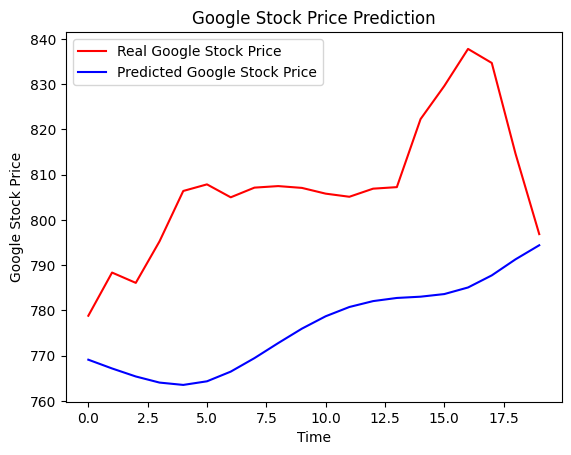

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()